In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load datasets from local disk

calendar = pd.read_csv('project 1/calendar.csv')
listings = pd.read_csv('project 1/listings.csv')
reviews = pd.read_csv('project 1/reviews.csv')

calendar.head()


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [2]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [4]:
#clear price and keep only the ones with available = 't'
calendar['price'] = calendar['price'].replace('[\$\,\.]', '', regex=True).astype(float)/100
calendar = calendar[calendar['available']=='t']
calendar['date'] = pd.to_datetime(calendar['date'])
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


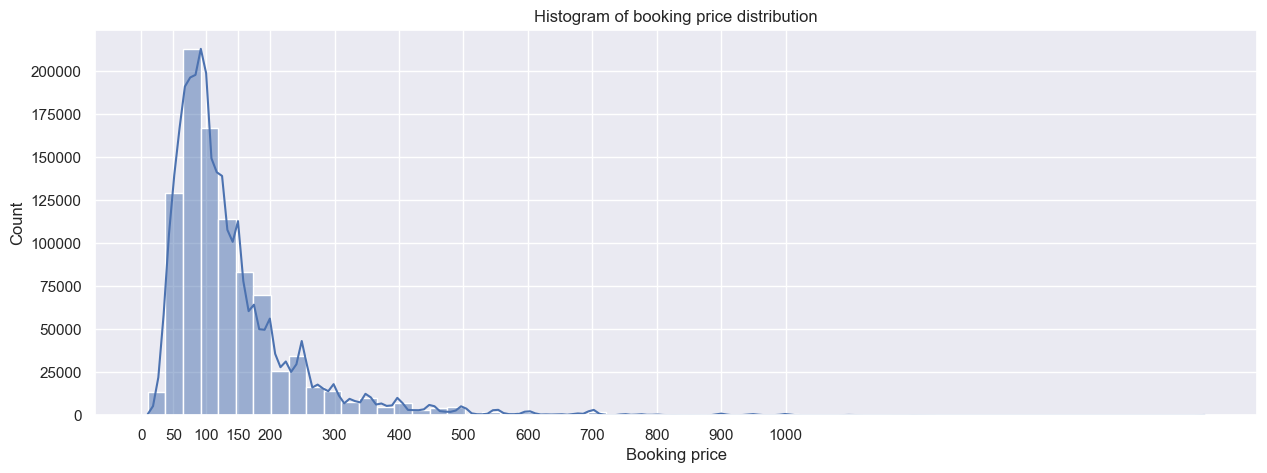

In [5]:
# Histogram of booking price distribution
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (15,5)
sns.histplot(data=calendar, x="price",kde=True,bins=60)
x = [0,50, 100, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
plt.xticks(x)
plt.title('Histogram of booking price distribution')
plt.xlabel('Booking price')
plt.show()

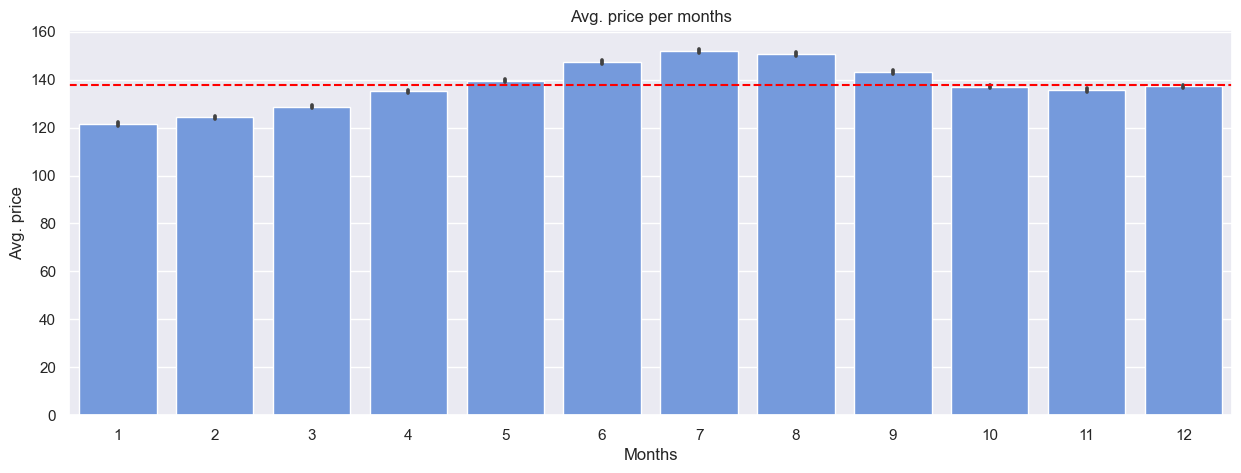

In [6]:
#plot the average price per month
df_calender = calendar[calendar.date.dt.year == 2016]
month = df_calender.date.dt.month
sns.barplot(data = calendar, x = month, y = 'price',color="cornflowerblue")
plt.ylabel('Avg. price')
plt.xlabel('Months')
plt.title('Avg. price per months');
plt.axhline(calendar.price.mean(), linestyle='--', color='red');

In [7]:
#missing cols list
missing_cols = ['security_deposit','cleaning_fee','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']
# check datatype of missing cols
listings[missing_cols].info()

# fill 0 to other missing cols
for col in missing_cols:
    listings[col].fillna(0,inplace=True)
    
# convert amenities to numerical data
listings['amenities'] = listings['amenities'].apply(lambda x: x[1:-1].split(','))
listings['TV'] = 0
listings['Internet'] = 0
listings['Kitchen'] = 0
listings['Free_parking'] = 0
listings['Washer_dryer'] = 0
listings['Air Conditioning'] = 0
listings['Smoke_detector'] = 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   security_deposit             1866 non-null   object 
 1   cleaning_fee                 2788 non-null   object 
 2   review_scores_rating         3171 non-null   float64
 3   review_scores_accuracy       3160 non-null   float64
 4   review_scores_cleanliness    3165 non-null   float64
 5   review_scores_checkin        3160 non-null   float64
 6   review_scores_communication  3167 non-null   float64
 7   review_scores_location       3163 non-null   float64
 8   review_scores_value          3162 non-null   float64
 9   reviews_per_month            3191 non-null   float64
dtypes: float64(8), object(2)
memory usage: 298.4+ KB


In [8]:
for i in range(len(listings)):
    if 'TV' in listings.loc[i,'amenities']:
        listings.loc[i,'TV'] = 1
    if 'Internet' in listings.loc[i,'amenities']:
        listings.loc[i,'Internet'] = 1
    if 'Kitchen' in listings.loc[i,'amenities']:
        listings.loc[i,'Kitchen'] = 1 
    if '"Free Parking on Premises"' in listings.loc[i,'amenities']:
        listings.loc[i,'Free_parking'] = 1
    if 'Washer' in listings.loc[i,'amenities']:
        listings.loc[i,'Washer_dryer'] = 1
    if '"Air Conditioning"' in listings.loc[i,'amenities']:
        listings.loc[i,'Air Conditioning'] = 1
    if '"Smoke Detector"' in listings.loc[i,'amenities']:
        listings.loc[i,'Smoke_detector'] = 1
        
# clean price, monthly price and weekly price formats
# fill missing values as 0
listings['price'].fillna('$0', inplace=True)
listings['monthly_price'].fillna('$0', inplace=True)
listings['weekly_price'].fillna('$0', inplace=True)
# remove commas from price
listings['price'] = listings['price'].apply(lambda x: ''.join(x.split(',')))
listings['monthly_price'] = listings['monthly_price'].apply(lambda x: ''.join(x.split(',')))
listings['weekly_price'] = listings['weekly_price'].apply(lambda x: ''.join(x.split(',')))
# convert to float
listings['price'] = listings['price'].apply(lambda x: float(x.split('$')[1]))
listings['monthly_price'] = listings['monthly_price'].apply(lambda x: float(x.split('$')[1]))
listings['weekly_price'] = listings['weekly_price'].apply(lambda x: float(x.split('$')[1]))

C:\Users\Vasileios Lygnos\AppData\Local\Temp\ipykernel_6856\2864406321.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  listings.corr()['price'].dropna().sort_values()[:-1].plot(kind='bar', color='cornflowerblue')


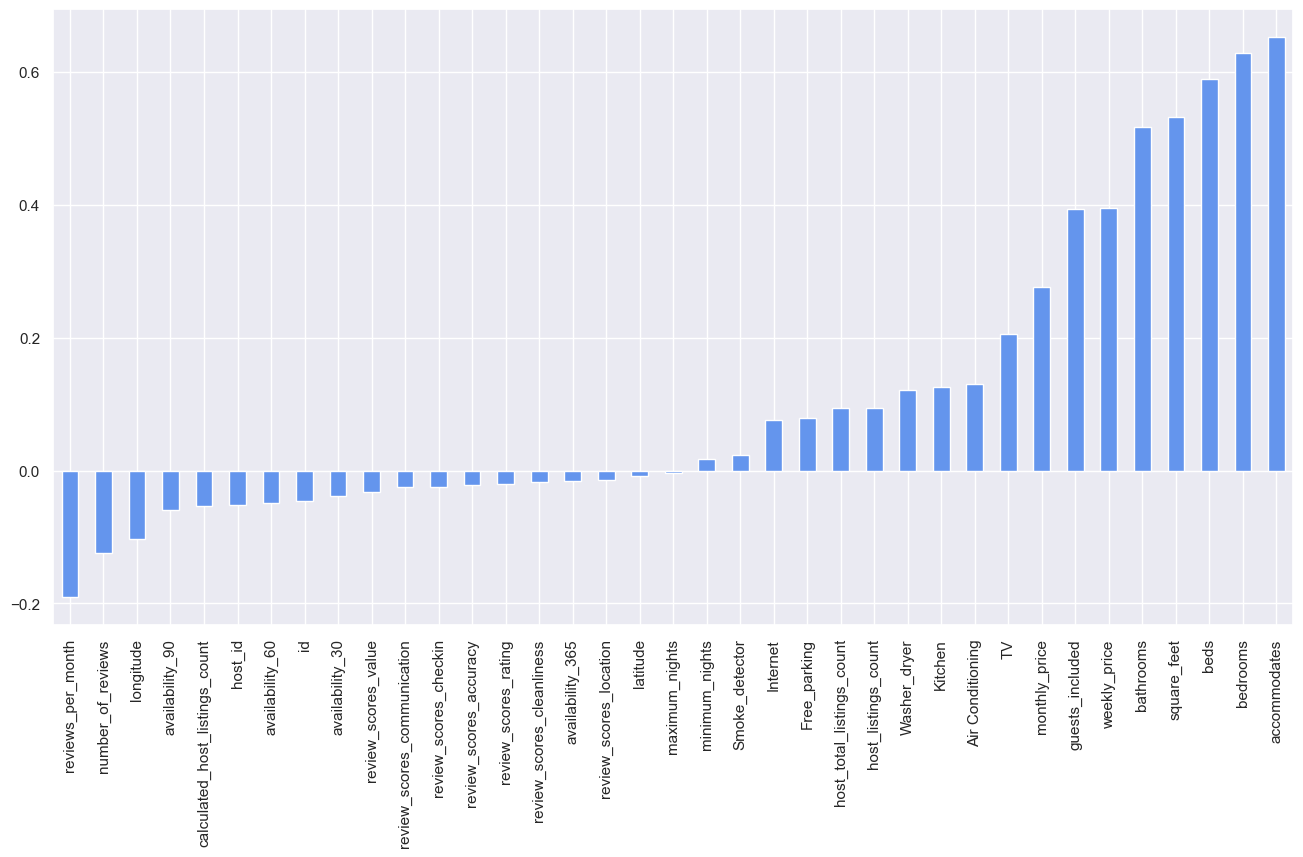

In [9]:
# find correlation to price
plt.figure(figsize=(16,8))
listings.corr()['price'].dropna().sort_values()[:-1].plot(kind='bar', color='cornflowerblue')
plt.show()

C:\Users\Vasileios Lygnos\AppData\Local\Temp\ipykernel_6856\2286157638.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  listings_new.corr()['price'].dropna().sort_values()[:-1].head(10).plot(kind='bar', color='cornflowerblue')


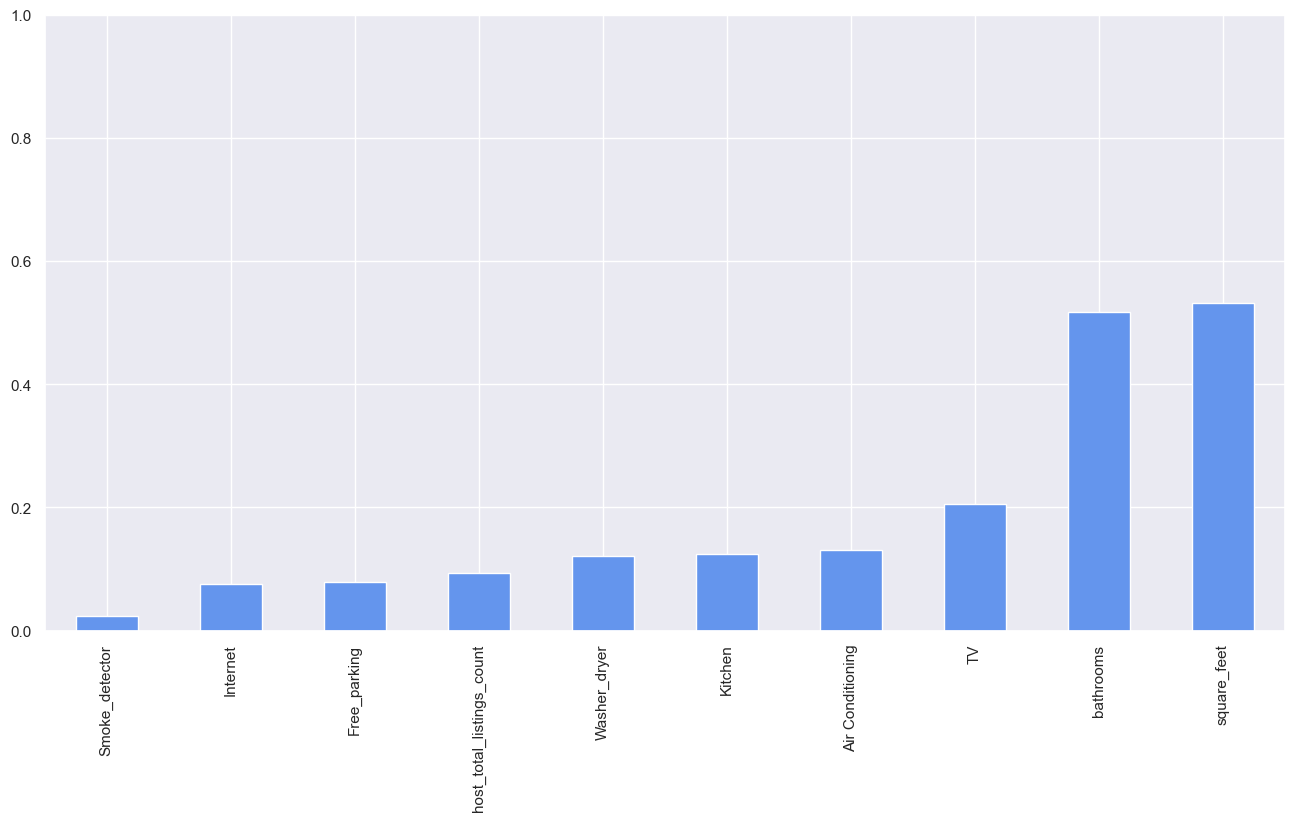

In [10]:
import copy
listings_new = copy.deepcopy(listings)
listings_new.sample(2)

# find correlation to price
plt.figure(figsize=(16,8))
listings_new.drop(['id','reviews_per_month','host_id','longitude','latitude',\
                  'reviews_per_month','number_of_reviews','availability_90',\
                  'calculated_host_listings_count','availability_60',\
                  'availability_30','review_scores_value','review_scores_communication',\
                  'review_scores_checkin','review_scores_accuracy','review_scores_rating',\
                  'review_scores_cleanliness','availability_365','review_scores_location',\
                  'maximum_nights','minimum_nights','host_listings_count','monthly_price',\
                  'guests_included','weekly_price'],axis=1,inplace=True)
listings_new.corr()['price'].dropna().sort_values()[:-1].head(10).plot(kind='bar', color='cornflowerblue')
plt.xticks(rotation=90)
plt.ylim(0,1)
plt.show()


C:\Users\Vasileios Lygnos\AppData\Local\Temp\ipykernel_6856\516316948.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  listing_new.corr()['price'].dropna().sort_values()[:-1].plot(kind='bar', color='cornflowerblue')


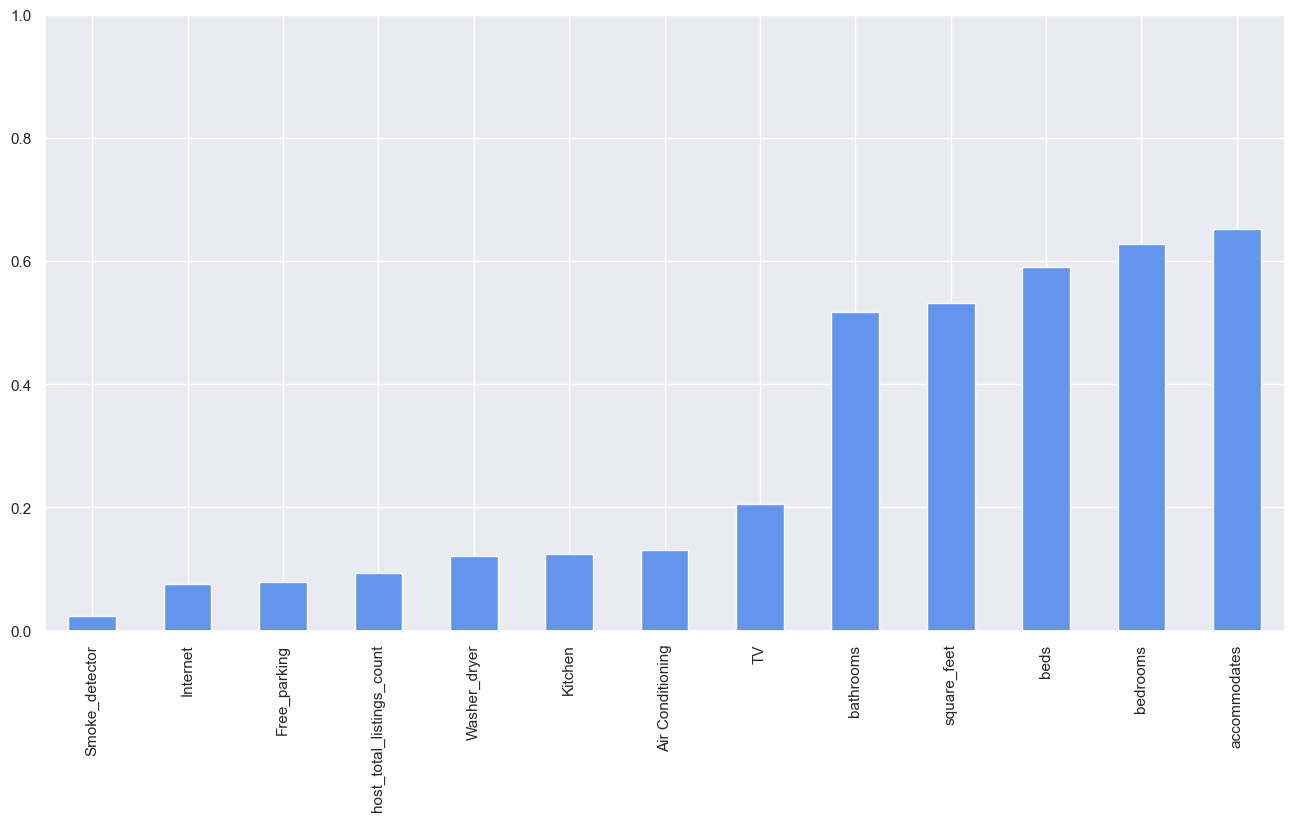

In [11]:
import copy
plt.figure(figsize=(16,8))
listing_new = copy.deepcopy(listings)
listing_new.drop(['id','reviews_per_month','host_id','longitude','latitude',
                  'reviews_per_month','number_of_reviews','availability_90',
                  'calculated_host_listings_count','availability_60',
                  'availability_30','review_scores_value','review_scores_communication',
                  'review_scores_checkin','review_scores_accuracy','review_scores_rating',
                  'review_scores_cleanliness','availability_365','review_scores_location',
                  'maximum_nights','minimum_nights','host_listings_count','monthly_price',
                  'guests_included','weekly_price'],axis=1,inplace=True)

listing_new.corr()['price'].dropna().sort_values()[:-1].plot(kind='bar', color='cornflowerblue')
plt.xticks(rotation=90)
plt.ylim(0,1)
plt.show()

In [12]:
listing_new.corr()['price'].dropna().sort_values()

C:\Users\Vasileios Lygnos\AppData\Local\Temp\ipykernel_6856\29571723.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  listing_new.corr()['price'].dropna().sort_values()


Smoke_detector               0.023887
Internet                     0.076280
Free_parking                 0.079408
host_total_listings_count    0.093962
Washer_dryer                 0.120973
Kitchen                      0.125024
Air Conditioning             0.130271
TV                           0.205824
bathrooms                    0.516424
square_feet                  0.531752
beds                         0.589525
bedrooms                     0.627720
accommodates                 0.652218
price                        1.000000
Name: price, dtype: float64

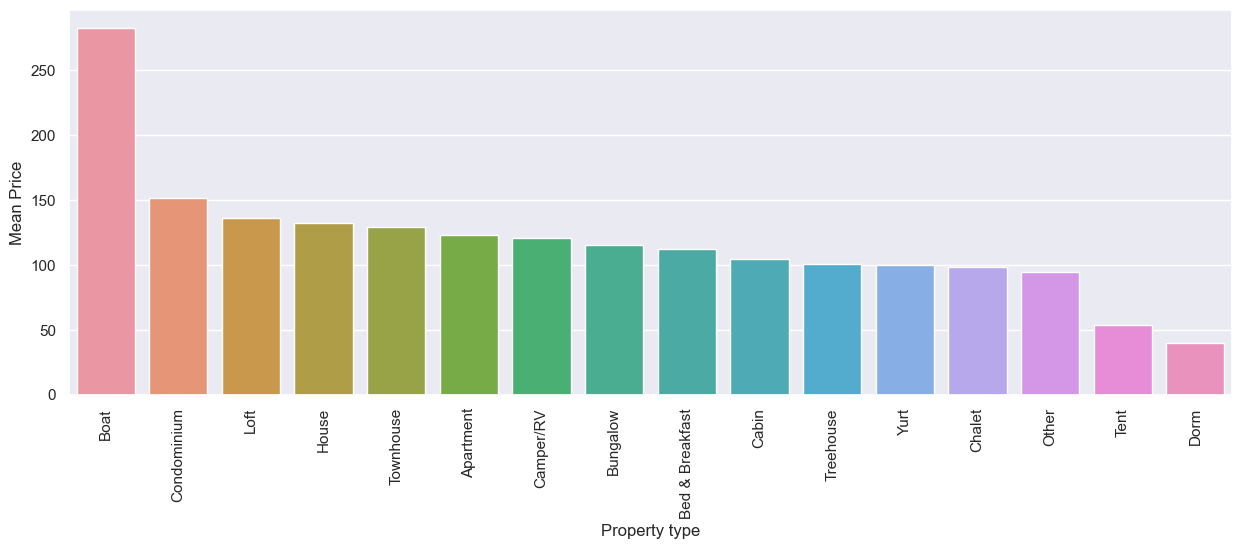

In [13]:
# mean price per Property type
x = pd.DataFrame(listings.groupby('property_type')['price'].mean().sort_values(ascending=False))
x = x.reset_index()

sns.barplot(x = 'property_type',
            y = 'price',
            data = x)
plt.xticks(rotation=90)
plt.xlabel('Property type')
plt.ylabel('Mean Price')
plt.show()

Text(0, 0.5, 'number of listings')

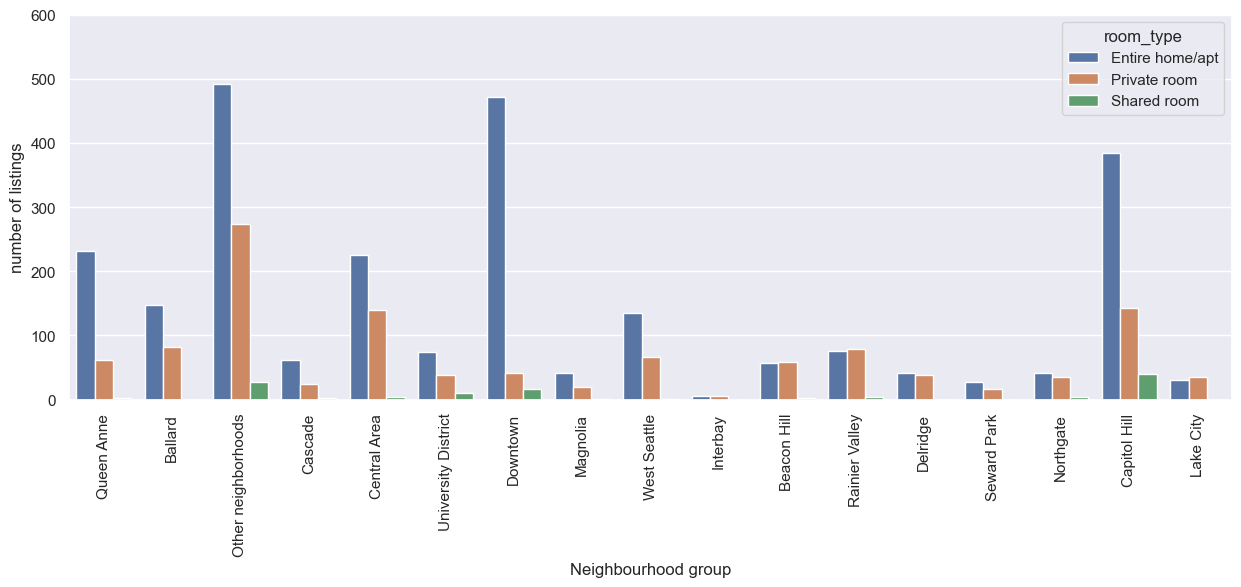

In [14]:
sns.countplot(data=listings, x='neighbourhood_group_cleansed', hue='room_type')
plt.xticks(rotation=90)
plt.ylim(0, 600)
plt.xlabel('Neighbourhood group')
plt.ylabel('number of listings')

(0.0, 500.0)

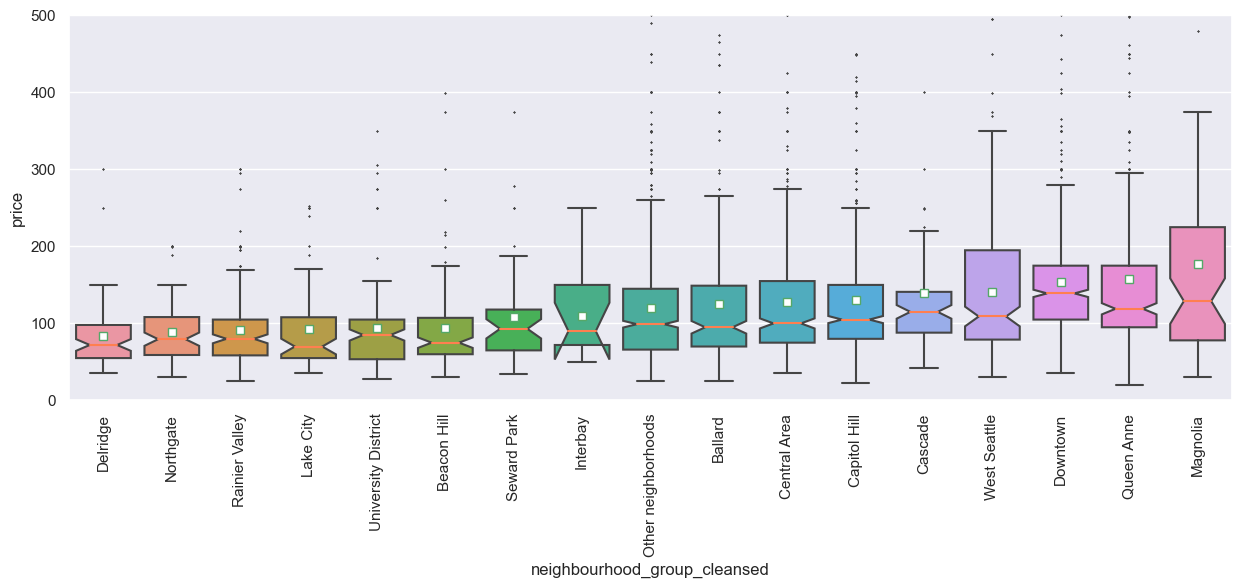

In [15]:
# mean price per Property type
order = listings.groupby(['neighbourhood_group_cleansed'])['price'].mean().sort_values().index.values
sns.boxplot(data=listings, x='neighbourhood_group_cleansed', y='price', fliersize=1, showmeans=True,
            flierprops={"marker": "x"}, medianprops={"color": "coral"}, notch=True, order=order,
            meanprops={"marker": "s", "markerfacecolor": "white"})
plt.xticks(rotation=90)
plt.ylim(0, 500)

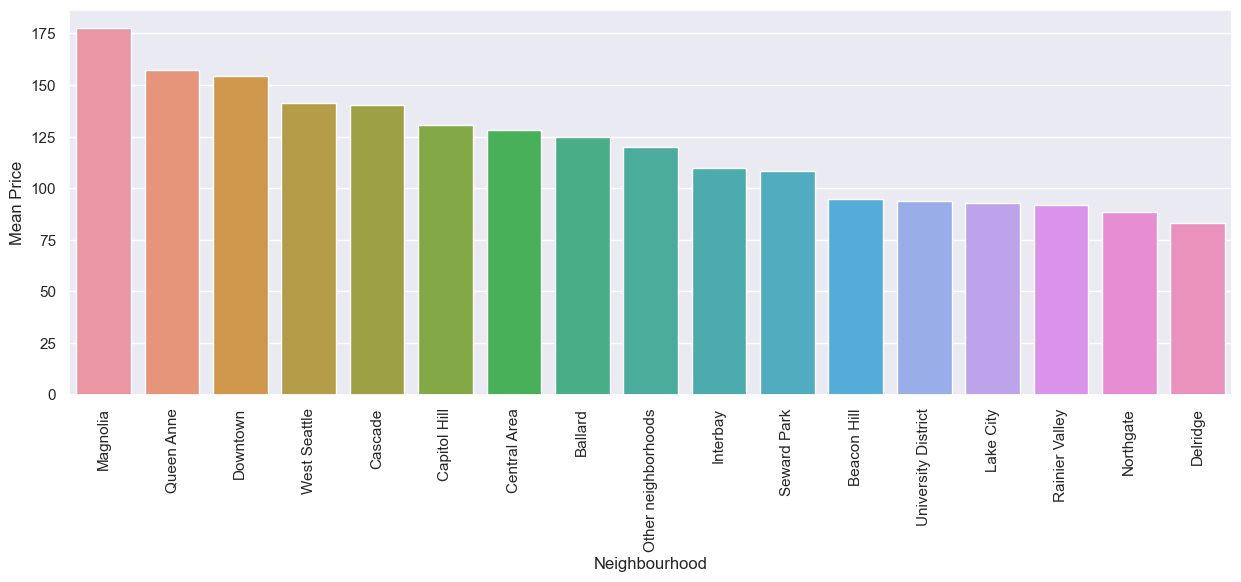

In [16]:
# mean price per Property type
x = pd.DataFrame(listings.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False))
x = x.reset_index()

sns.barplot(x = 'neighbourhood_group_cleansed',
            y = 'price',
            data = x)
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Price')
plt.show()